# Secondary Mushroom
https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

## Информация о переменных:
(n: номинальная, m: метрическая; номинальные значения в виде множеств значений)

1. cap-diameter (m):
          число с плавающей запятой в см
2. cap-shape (n):
          колокольчик = b, конусовидный = c, выпуклый = x, плоский = f, вогнутый = s, шаровидный = p, другие = o
3. cap-surface (n):
          волокнистый = i, бороздчатый = g, чешуйчатый = y, гладкий = s, блестящий = h, кожистый = l, шелковистый = k, липкий = t, морщинистый = w, мясистый = e
4. cap-color (n):
          коричневый = n, светло-коричневый = b, серый = g, зеленый = r, розовый = p, фиолетовый = u, красный = e, белый = w, желтый = y, синий = l, оранжевый = o, черный = k
5. does-bruise-bleed (n):
          синяки-или-кровотечения = t, нет = f
6. gill-attachment (n):
          приросший = a, прикрепленный = x, нисходящий = d, свободный = e, изгибистый = s, поры = p, нет = f, неизвестно = ?
7. gill-spacing (n):
          близко = c, далеко = d, нет = f
8. gill-color (n):
          см. cap-color + нет = f
9. stem-height (m):
          число с плавающей запятой в см
10. stem-width (m):
          число с плавающей запятой в мм
11. stem-root (n):
          луковичный = b, утолщенный = s, клубневидный = c, чашечный = u, равный = e, ризоморфные = z, корневой = r
12. stem-surface (n):
          см. cap-surface + нет = f
13. stem-color (n):
          см. cap-color + нет = f
14. veil-type (n):
          частичный = p, универсальный = u
15. veil-color (n):
          см. cap-color + нет = f
16. has-ring (n):
          кольцо = t, нет = f
17. ring-type (n):
          паутинный = c, исчезающий = e, расширяющийся = r, бороздчатый = g, крупный = l, подвесной = p, оберточный = s, зональный = z, чешуйчатый = y, подвижный = m, нет = f, неизвестно = ?
18. spore-print-color (n):
          см. cap color
19. habitat (n):
          травы = g, листья = l, луга = m, пути = p, вересковые = h, городские = u, свалки =  w, леса = d
20. season (n):
          весна = s, лето = u, осень = a, зима = w



In [ ]:
# Подключаем необходимые библиотеки.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

In [ ]:
# Импортируем google диск

from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Считываем данные из файла secondary_data.csv

primary_data = pd.read_csv('/content/drive/My Drive/DataSet/secondary_data.csv', sep=';')

In [ ]:
primary_data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
# Выводим информацию о датафрейме

primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

Стоит сразу обратить внимание, что пропущенные значения есть в столбцах:

 3   cap-surface            
 6   gill-attachment       
 7   gill-spacing           
 11  stem-root              
 12  stem-surface           
 14  veil-type            
 15  veil-color              
 17  ring-type             
 18  spore-print-color     

  Для дальнейшей работы необходимо будет заменить пропущенные значения. Моё мнение такого: в данном наборе данных нецелесообразно заменять значения на наиболее популярное, так как легко наделать ошибок и превратить набор данных в "белиберду". Поэтому, когда будем заменять категориальные данные на числовые, введём ещё одну категорию - неизвестно.

####Справка "DataFrame.describe()"

*count:* Количество ненулевых (непустых) значений в каждом столбце.

*mean:* Среднее арифметическое значений в столбце.

*std:* Стандартное отклонение значений в столбце, показывающее, насколько данные разбросаны.

*min:* Минимальное значение в столбце.

*25%, 50% (медиана), 75%:* Квартильные значения, которые делят данные на части (25-й процентиль, медиана (50-й процентиль), и 75-й процентиль).
max: Максимальное значение в столбце.

In [ ]:
primary_data.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


Как мы видим, в данным момент 3 числовых и 18 категориальных столбца. Категориальные данные неудобны в машинном обучение, так как большинство алгоритмов работают с числами и не могут напрямую обрабатывать текстоввые и категориальные значения. Заменим категориальные значения в столбца на числовые.

In [ ]:
label_encoders = {}
n = 1

for column in primary_data.columns:
    if primary_data[column].dtype == 'object':  # Проверяем, является ли столбец категориальным (строковым)
        le = LabelEncoder()
        primary_data[column] = le.fit_transform(primary_data[column])
        label_encoders[column] = le  # Сохраняем экземпляр LabelEncoder для возможного обратного преобразования

# Вывод информации о заменах
for column, le in label_encoders.items():
    print(f"{n}. Заменены значения в столбце '{column}':")
    n += 1
    unique_classes = le.classes_
    for idx, original_value in enumerate(unique_classes):
        print(f"  '{original_value}' на {idx}")

1. Заменены значения в столбце 'class':
  'e' на 0
  'p' на 1
2. Заменены значения в столбце 'cap-shape':
  'b' на 0
  'c' на 1
  'f' на 2
  'o' на 3
  'p' на 4
  's' на 5
  'x' на 6
3. Заменены значения в столбце 'cap-surface':
  'd' на 0
  'e' на 1
  'g' на 2
  'h' на 3
  'i' на 4
  'k' на 5
  'l' на 6
  's' на 7
  't' на 8
  'w' на 9
  'y' на 10
  'nan' на 11
4. Заменены значения в столбце 'cap-color':
  'b' на 0
  'e' на 1
  'g' на 2
  'k' на 3
  'l' на 4
  'n' на 5
  'o' на 6
  'p' на 7
  'r' на 8
  'u' на 9
  'w' на 10
  'y' на 11
5. Заменены значения в столбце 'does-bruise-or-bleed':
  'f' на 0
  't' на 1
6. Заменены значения в столбце 'gill-attachment':
  'a' на 0
  'd' на 1
  'e' на 2
  'f' на 3
  'p' на 4
  's' на 5
  'x' на 6
  'nan' на 7
7. Заменены значения в столбце 'gill-spacing':
  'c' на 0
  'd' на 1
  'f' на 2
  'nan' на 3
8. Заменены значения в столбце 'gill-color':
  'b' на 0
  'e' на 1
  'f' на 2
  'g' на 3
  'k' на 4
  'n' на 5
  'o' на 6
  'p' на 7
  'r' на 8
  '

In [ ]:
primary_data.describe()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,...,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000
mean,0.554913,6.733854,4.041641,6.758666,6.144541,0.173410,3.242938,1.473988,7.338502,6.581538,...,4.543353,6.679461,8.429072,0.947977,5.713685,0.248555,1.733236,6.548069,0.623721,1.053300
std,0.496979,5.264845,2.138630,3.697194,3.171077,0.378605,2.593530,1.370916,3.186426,3.370017,...,1.256036,2.110324,3.218516,0.222075,0.852051,0.432179,1.950244,1.465584,1.265880,1.100575
min,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.480000,2.000000,3.000000,5.000000,0.000000,1.000000,0.000000,5.000000,4.640000,...,5.000000,5.000000,6.000000,1.000000,6.000000,0.000000,1.000000,7.000000,0.000000,0.000000
50%,1.000000,5.860000,5.000000,8.000000,5.000000,0.000000,3.000000,1.000000,7.000000,5.950000,...,5.000000,8.000000,11.000000,1.000000,6.000000,0.000000,1.000000,7.000000,0.000000,1.000000
75%,1.000000,8.540000,6.000000,10.000000,10.000000,0.000000,6.000000,3.000000,10.000000,7.740000,...,5.000000,8.000000,11.000000,1.000000,6.000000,0.000000,1.000000,7.000000,1.000000,2.000000
max,1.000000,62.340000,6.000000,11.000000,11.000000,1.000000,7.000000,3.000000,11.000000,33.920000,...,5.000000,8.000000,12.000000,1.000000,6.000000,1.000000,8.000000,7.000000,7.000000,3.000000


In [ ]:
primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  int64  
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  int64  
 3   cap-surface           61069 non-null  int64  
 4   cap-color             61069 non-null  int64  
 5   does-bruise-or-bleed  61069 non-null  int64  
 6   gill-attachment       61069 non-null  int64  
 7   gill-spacing          61069 non-null  int64  
 8   gill-color            61069 non-null  int64  
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             61069 non-null  int64  
 12  stem-surface          61069 non-null  int64  
 13  stem-color            61069 non-null  int64  
 14  veil-type             61069 non-null  int64  
 15  veil-color         

Теперь мы видим, что все значения непустые и числовые.

In [ ]:
primary_data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1,15.26,6,2,6,0,2,3,10,16.95,...,4,7,11,0,4,1,2,7,0,3
1,1,16.60,6,2,6,0,2,3,10,17.99,...,4,7,11,0,4,1,2,7,0,2
2,1,14.07,6,2,6,0,2,3,10,17.80,...,4,7,11,0,4,1,2,7,0,3
3,1,14.17,2,3,1,0,2,3,10,15.77,...,4,7,11,0,4,1,5,7,0,3
4,1,14.64,6,3,6,0,2,3,10,16.53,...,4,7,11,0,4,1,5,7,0,3


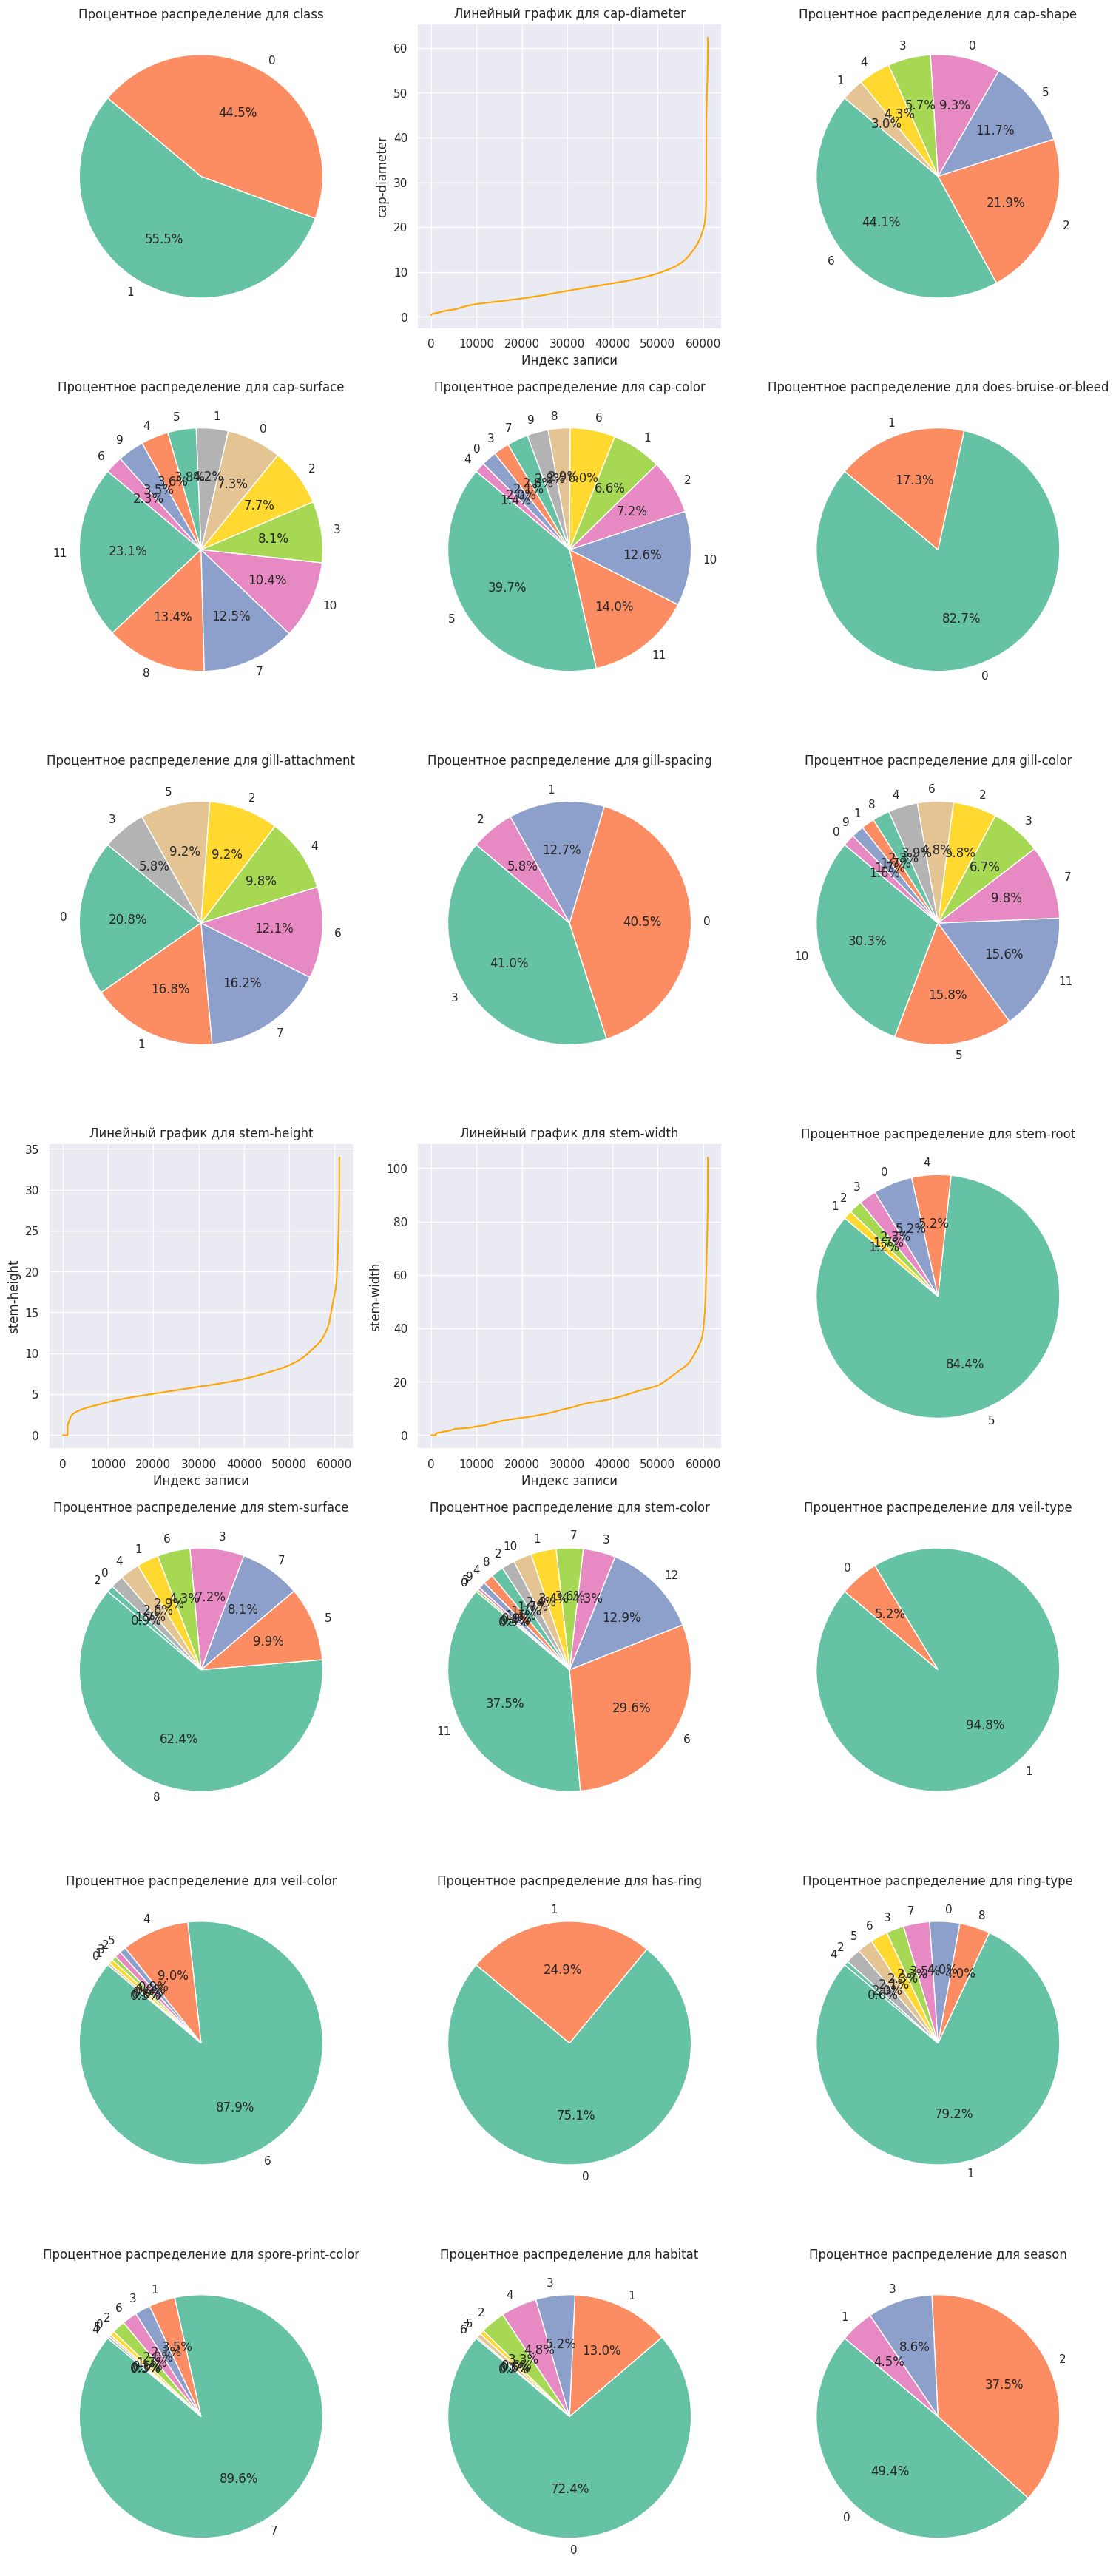

In [ ]:
name = primary_data.columns  # Получаем список столбцов

ncols = 3  				 		                    # Количество столбцов в таблице графиков
nrows = (len(name) + ncols - 1) // ncols  # Количество строк в таблице графиков
# Данная формула округляет количество строк в большую сторону, это гарантирует, что строк хватит (хотя можно было сразу задать числом, так как количество столбцов нам уже известно)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))            # Создаём сетку (фигуру и набор пографов)
axes = axes.flatten()                                                                         # Преобразуем в одномерный массив для удобства

# Цикл по индексу и названию столбца
for i, column in enumerate(name):
    ax = axes[i]       # Работаем с нужным графиком

    # Данное условие нужно так как в данных столбца некатегориальные данные, а числовые, поэтому для этих столбцов будем строить другой график
    if column not in ['cap-diameter', 'stem-height', 'stem-width']:
        value_counts = primary_data[column].value_counts() # Подсчитываем количество уникальных значений в текущем столбце
        # Строим круговую диаграмму:
        ax.pie(
            value_counts,                                       # Значения
            labels=value_counts.index,                          # Метки секторов
            autopct='%1.1f%%',                                  # Формат отображения процентов
            startangle=140,                                     # Начальный угол отображения диаграммы
            colors=sns.color_palette('Set2', len(value_counts)) # Цвет
        )
        ax.set_title(f'Процентное распределение для {column}')
    else:
        # Линейная диаграмма для некатегориальных значений:
        sorted_values = primary_data[column].sort_values().reset_index(drop=True) # Сортируем значения по возрастанию и сбрасываем индексы
        ax.plot(
            sorted_values, # Значения
            #marker='o',    # Метки - точки
            linestyle='-', # Соединяем точки линией (хотя здесь так много значений, что этого толком не видно)
            color='orange') # Цвет
        ax.set_title(f'Линейный график для {column}') # Заголово
        ax.set_xlabel('Индекс записи')                # Метка оси X
        ax.set_ylabel(column)                         # Метка оси Y

# Стоило бы ещё заменить категории на их расшифровку, но было бы загромождение на графиках :)

# Отображаем наш рисунок
plt.tight_layout()
plt.show()

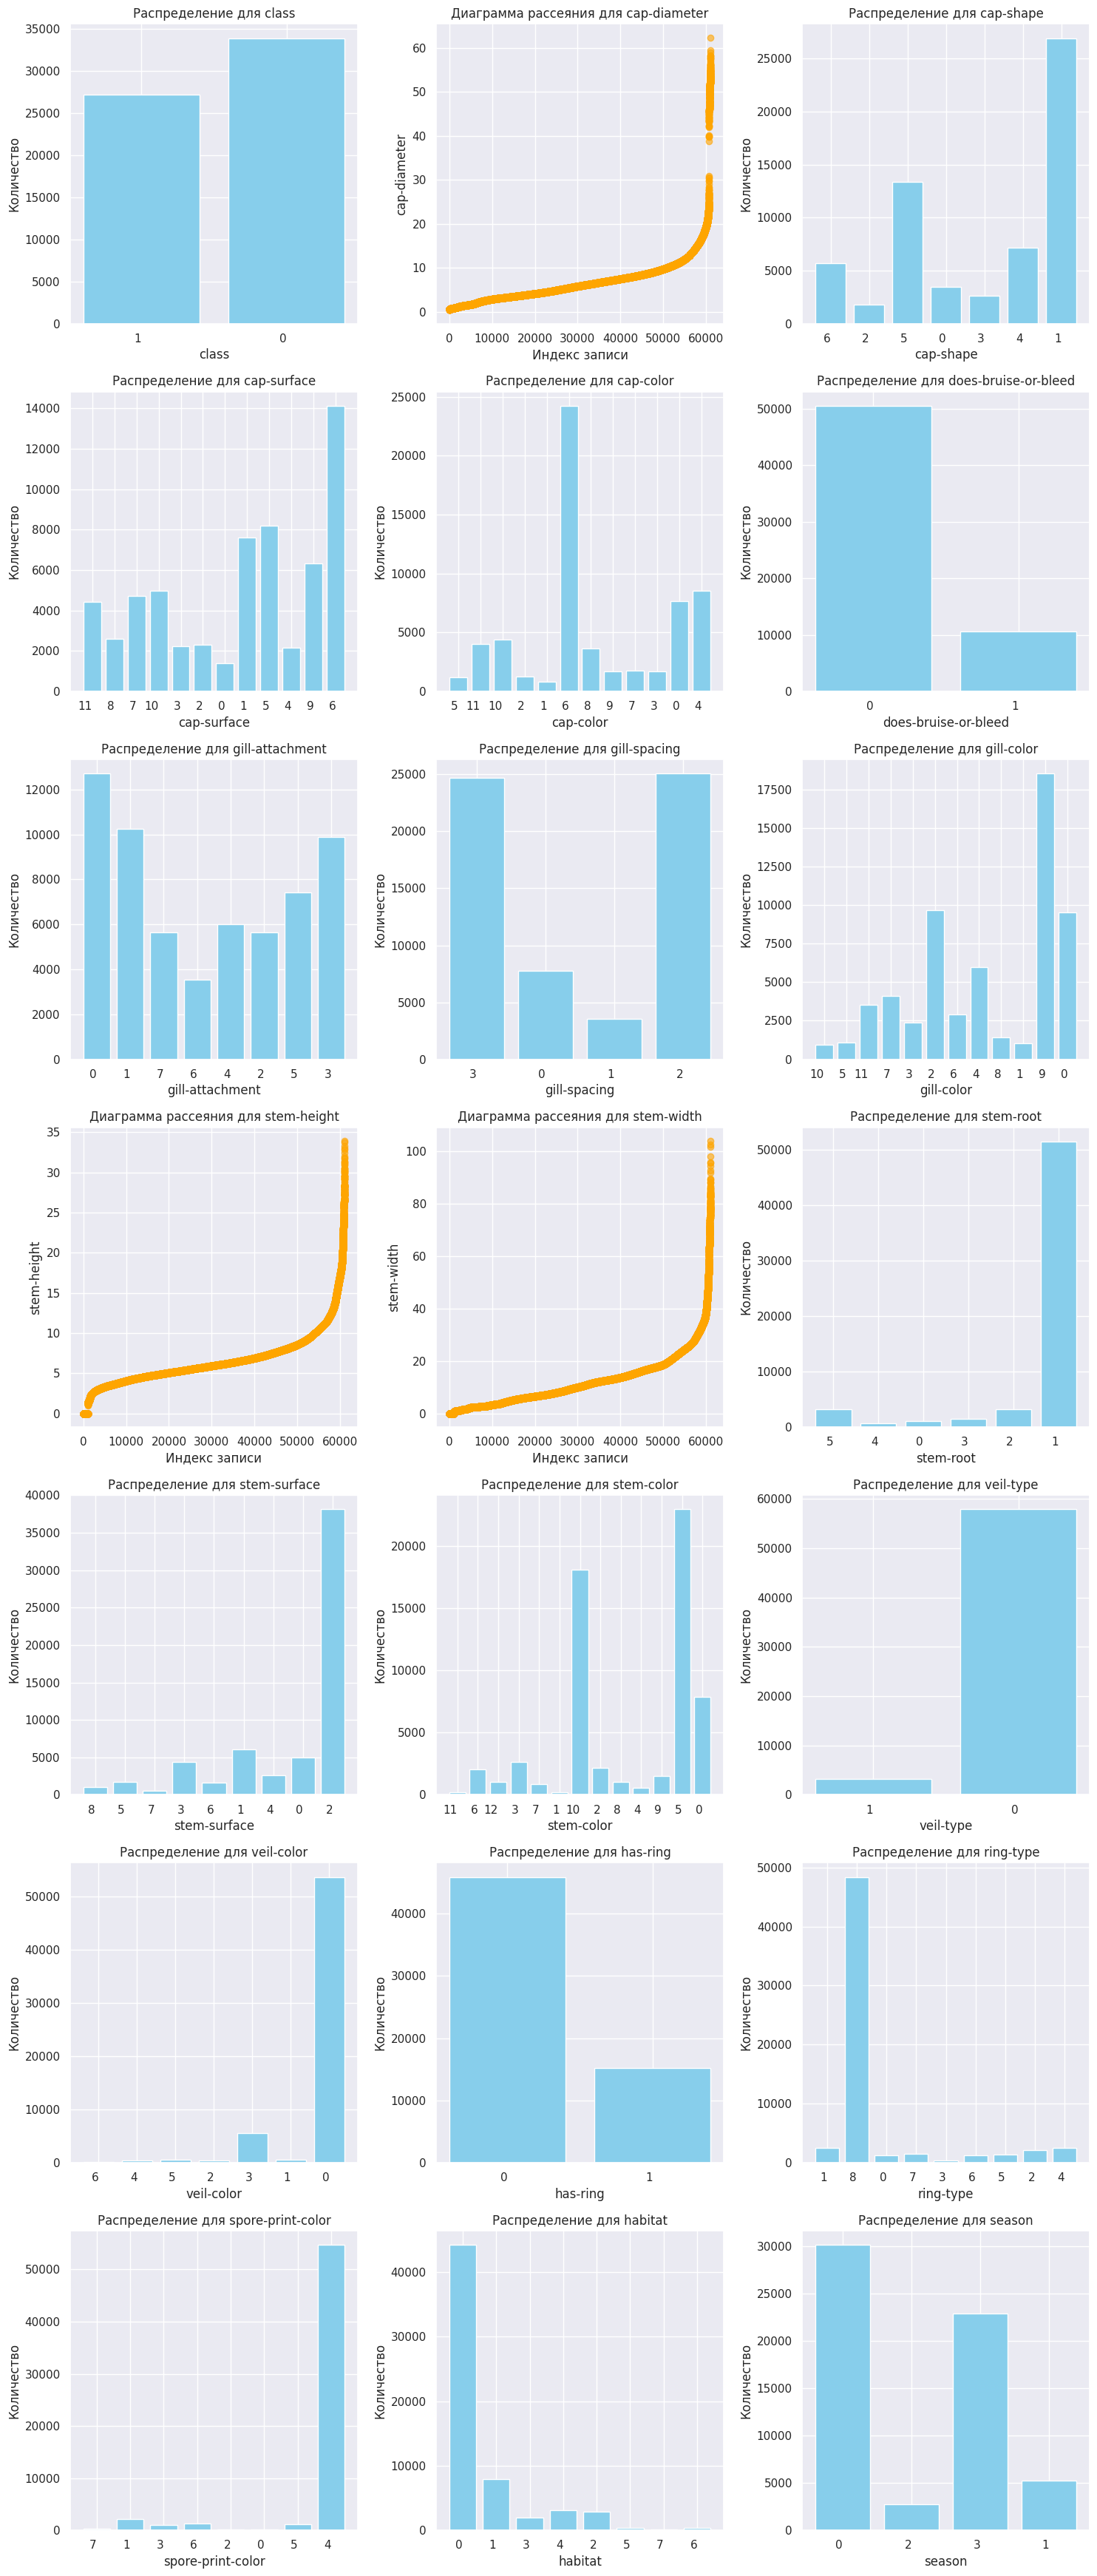

In [ ]:
# name = primary_data.columns  # Получаем список столбцов

# ncols = 3  # Количество столбцов в сетке графиков
# nrows = (len(name) + ncols - 1) // ncols  # Количество строк в сетке графиков (округляем в большую сторону)

# Создаем сетку графиков (fig) и массив осей (axes) с размером, зависящим от ncols и nrows
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
axes = axes.flatten()  # Преобразуем массив осей в одномерный для удобства работы с ними

# Цикл по всем столбцам данных
for i, column in enumerate(name):
    ax = axes[i]  # Выбираем соответствующий подграфик

    # Условие для проверки, является ли столбец категориальным или числовым
    if column not in ['cap-diameter', 'stem-height', 'stem-width']:
        # Если столбец не является числовым, строим столбчатую диаграмму
        value_counts = primary_data[column].value_counts()  # Подсчитываем количество уникальных значений

        # Строим столбчатую диаграмму
        bars = ax.bar(
            value_counts.index,   # Метки для каждого столбца (уникальные значения)
            value_counts.values,  # Значения высоты столбцов (количество уникальных значений)
            color='skyblue'       # Цвет столбцов
        )

        # Подписываем только столбцы
        ax.set_xticks(range(len(value_counts.index)))  # Устанавливаем метки только в позиции каждого столбца
        ax.set_xticklabels(value_counts.index, ha='right')  # Устанавливаем подписи и поворачиваем для лучшей читаемости

        ax.set_title(f'Распределение для {column}')  # Заголовок для графика
        ax.set_ylabel('Количество')  # Метка оси Y
        ax.set_xlabel(column)  # Метка оси X
    else:
        # Если столбец числовой, строим диаграмму рассеяния
        sorted_values = primary_data[column].sort_values().reset_index(drop=True)  # Сортируем значения и сбрасываем индексы

        # Строим диаграмму рассеяния
        ax.scatter(
            x=range(len(sorted_values)),  # Индексы для оси X
            y=sorted_values,              # Значения для оси Y
            color='orange',               # Цвет точек
            alpha=0.6                     # Прозрачность точек для лучшей визуализации
        )
        ax.set_title(f'Диаграмма рассеяния для {column}')  # Заголовок для графика
        ax.set_xlabel('Индекс записи')  # Метка оси X
        ax.set_ylabel(column)  # Метка оси Y

# Удаляем лишние подграфики, если они не используются
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Делаем макет графика плотным, чтобы избежать наложения элементов
plt.tight_layout()
# Отображаем графики
plt.show()


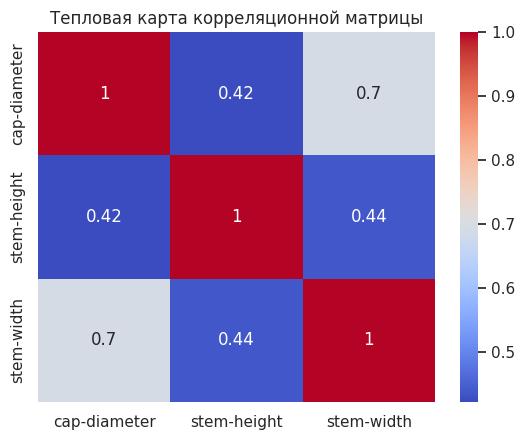

In [ ]:
# Тепловая карта корреляции
numerical_columns = ['cap-diameter', 'stem-height', 'stem-width']

corr_matrix = primary_data[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляционной матрицы')
plt.show()


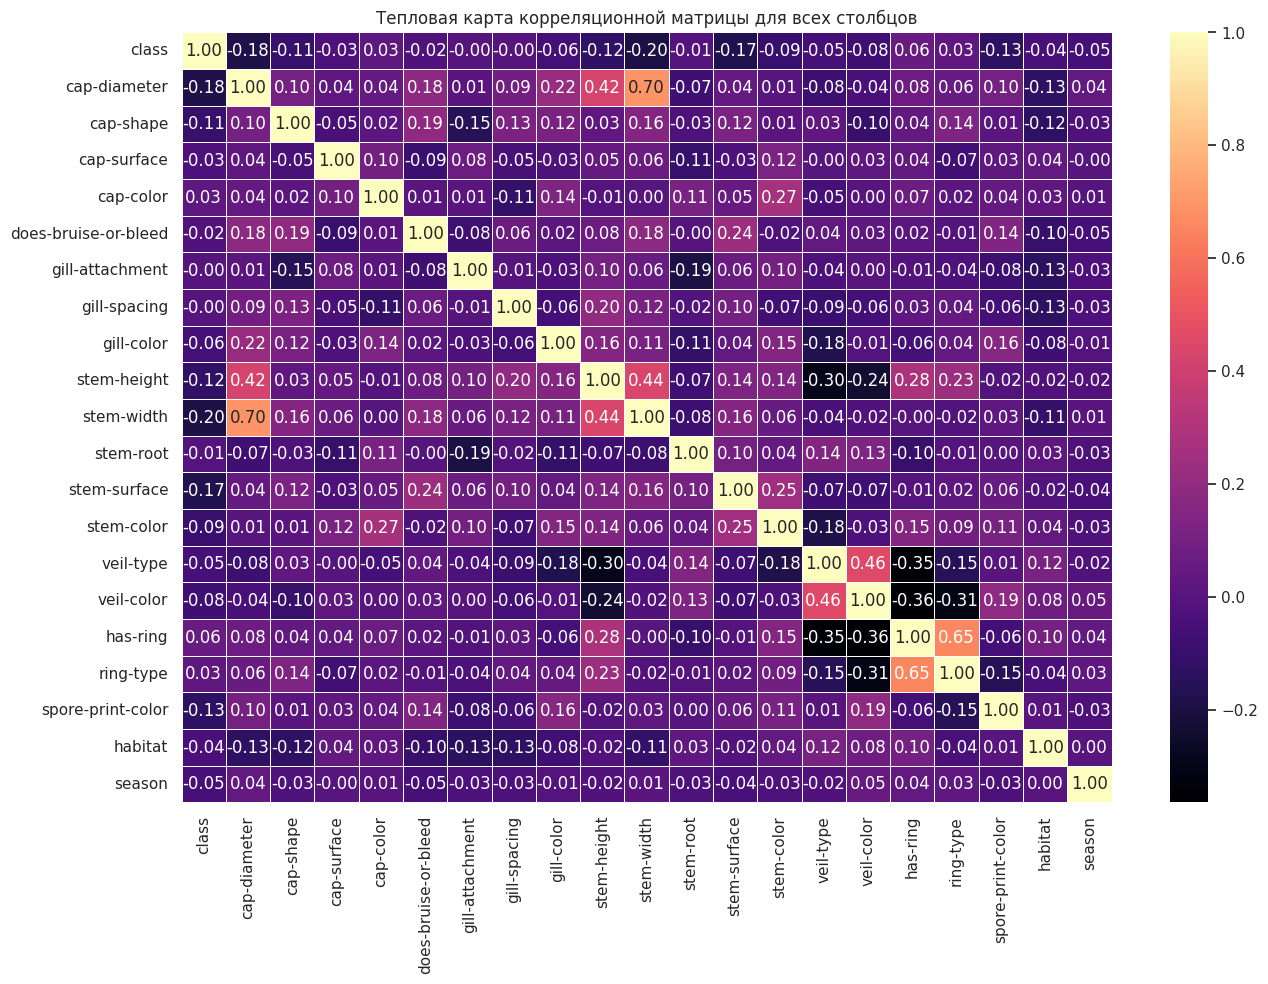

In [ ]:
# Расчет корреляционной матрицы для всех числовых столбцов в датафрейме
corr_matrix = primary_data.corr()

# Построение тепловой карты
plt.figure(figsize=(15, 10))  # Увеличение размера графика для лучшей читаемости
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title('Тепловая карта корреляционной матрицы для всех столбцов')
plt.show()

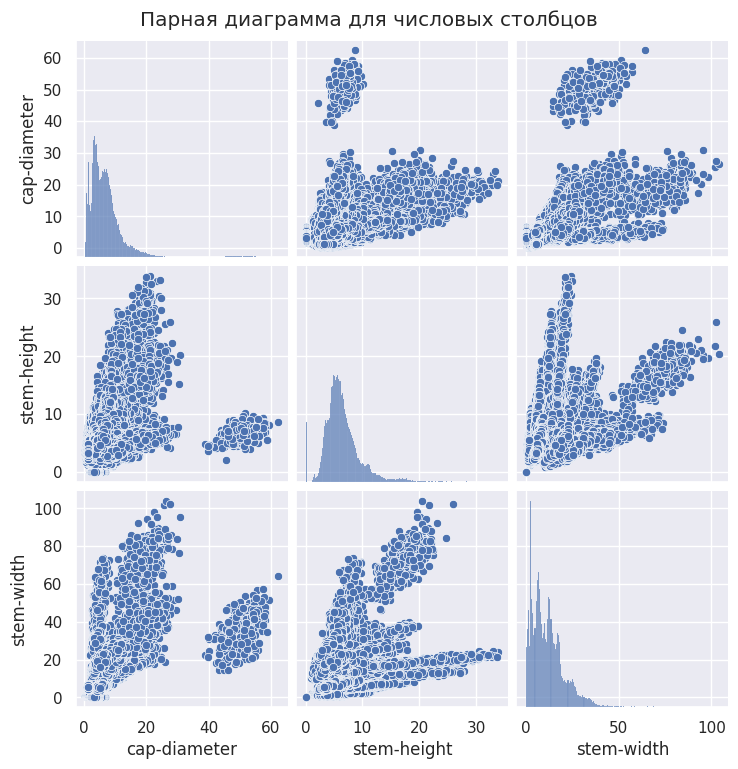

In [ ]:
# Парные графики для числовых признаков - визуализирует возможные зависимости между числовыми признаками.
sns.pairplot(primary_data[numerical_columns])
plt.suptitle('Парная диаграмма для числовых столбцов', y=1.02)
plt.show()